# Digit Recognition with CNN on MNIST Dataset":
 
"This notebook demonstrates a deep learning project using the popular **MNIST dataset** of handwritten digits."\
"We preprocess the data, build a **Convolutional Neural Network (CNN)** using TensorFlow/Keras, and evaluate its performance."\
"**Goals of the Project:**"\
"- Learn how to handle image data using TensorFlow"\
"- Understand the structure and function of CNNs"\
"- Train, evaluate, and visualize a model on digit classification"\
"Let's dive into the world of computer vision and digit recognition! 🚀"

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist # type: ignore

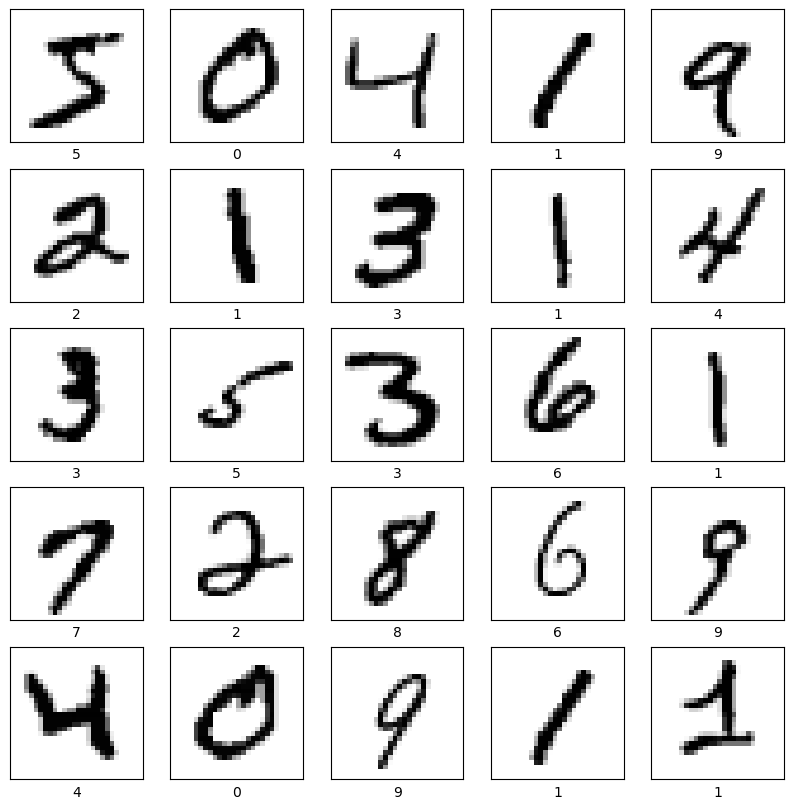

In [3]:
# load the MNIST Datste
(X_train,y_train),(X_test,y_test)=mnist.load_data()
# display some sampleimages
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
#explore the data
print(f'We Have {len(X_train)} images in the training set and {len(X_test)} image sinthe test set')
print(f'The size ofthe images is {X_train[0].shape}.')

We Have 60000 images in the training set and 10000 image sinthe test set
The size ofthe images is (28, 28).


In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

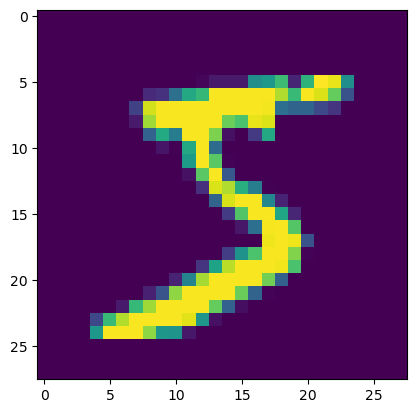

In [7]:
plt.imshow(X_train[0])

Text(0.5, 1.0, '5')

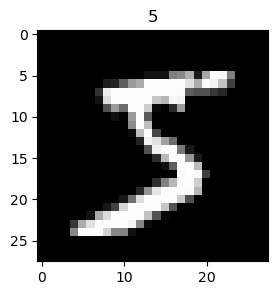

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0],cmap='gray')
plt.title(y_train[0])

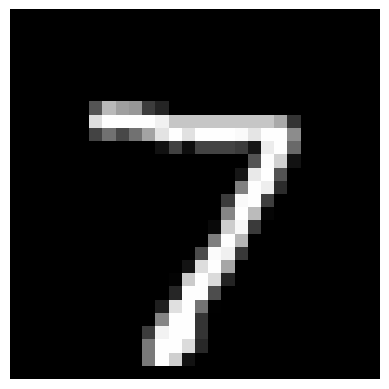

In [9]:
image_index=0
image=X_test[image_index]
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.show()


(-0.5, 27.5, 27.5, -0.5)

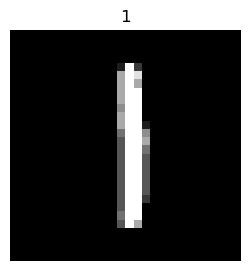

In [10]:
import random
random_iamge=random.randint(0,len(X_train))
plt.figure(figsize=(3,3))
plt.imshow(X_train[random_iamge],cmap='gray')
plt.title(y_train[random_iamge])
plt.axis(False) 

In [11]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

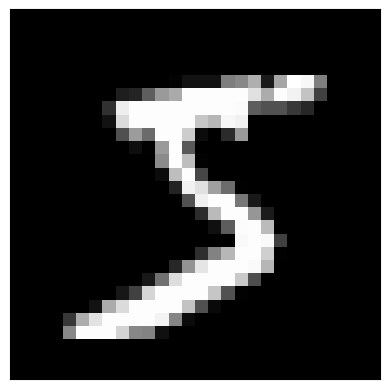

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [12]:
plt.imshow(X_train[0],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


# display the first image inthe datset as adata index
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel),end=" ")
    print()

In [23]:
# load and preprocess the MNIST dataset
(X_train,X_test),(y_train,y_test)=tf.keras.datasets.mnist.load_data()
# reshape the data as we donot 3rd valeu of animaeg
X_train=X_train.reshape(X_train.shape+(1,))
X_test=X_test.reshape(X_test.shape+(1,))

X_train.shape,X_test.shape

((60000, 28, 28, 1), (60000, 1))

### Normalize the Data:

In [24]:
X_train=X_train/255
X_test=X_test/255

In [25]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (60000, 1))

In [26]:
# values need to change the datsa type to float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

### Build the model:

In [39]:
# creat an input layer
import tensorflow as tf
from tensorflow.keras import layers
# create an input layer 
input_layer=layers.Input(shape=(28,28,1)) #28x28 pixel imaegs with 1 color chan(grayescale)
# Bulid the model
model=tf.keras.Sequential([
    input_layer,#input_layer
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),#conv layer
    # filter isthe no of filter we need to apply
    # kernel isthe size of window/filter moving over the image
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),#pooling layer
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),#pooling layer
    layers.Flatten(),#flatten layer
    layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train the model


In [38]:
y_train.shape,X_train.shape,X_test.shape

((10000, 28, 28), (60000, 28, 28, 1), (60000, 1))

In [47]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Reload MNIST dataset properly
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize input images
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train_cat:", y_train_cat.shape)


X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)
y_train_cat: (60000, 10)


### Train the model:

In [48]:
hist=model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.9823 - loss: 0.0562 - val_accuracy: 0.9820 - val_loss: 0.0648
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9856 - loss: 0.0482 - val_accuracy: 0.9846 - val_loss: 0.0501
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.9872 - loss: 0.0424 - val_accuracy: 0.9820 - val_loss: 0.0601
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 73ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9866 - val_loss: 0.0477
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.9896 - loss: 0.0345 - val_accuracy: 0.9851 - val_loss: 0.0523


### Evaluate:

In [49]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9849 - loss: 0.0453
Test Loss: 0.036636658012866974
Test Accuracy: 0.9882000088691711


In [45]:
model.save("models/digit_recognizer.h5")